# Heart Disease Dectection Project

### Algorithm : Logistic Regression

#### Algorithm Type : Binary Classification

## Importing the Dependencies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pickle

## Data Loading

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Female,asymptomatic,125.0,212.0,0,1.0,168.0,0,1.0,2.0,2,reversible defect,0
1,53,Male,asymptomatic,140.0,203.0,1,0.0,155.0,1,3.1,0.0,0,reversible defect,0
2,70,Male,asymptomatic,145.0,174.0,0,1.0,125.0,1,2.6,0.0,0,reversible defect,0
3,61,Male,asymptomatic,148.0,203.0,0,1.0,161.0,0,0.0,2.0,1,reversible defect,0
4,62,Female,asymptomatic,138.0,294.0,1,1.0,106.0,0,1.9,1.0,3,normal blood flow,0


In [4]:
df.shape

(1200, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1200 non-null   int64  
 1   gender    1200 non-null   object 
 2   cp        1200 non-null   object 
 3   trestbps  1199 non-null   float64
 4   chol      1198 non-null   float64
 5   fbs       1200 non-null   int64  
 6   restecg   1199 non-null   float64
 7   thalach   1199 non-null   float64
 8   exang     1200 non-null   int64  
 9   oldpeak   1200 non-null   float64
 10  slope     1199 non-null   float64
 11  ca        1200 non-null   int64  
 12  thal      1191 non-null   object 
 13  target    1200 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 131.4+ KB


## Data Preparation

#### Renaming the columns

In [6]:
df.rename(columns = {'cp' : 'chestpain', 'trestbps' : 'resting_blood_pressure', 'chol' : 'cholestrol', 'fbs' : 'fasting_blood_sugar', 'thalach' : 'max_heart_rate', 'exang' : 'exercise_induced_angina', 'ca' : 'major_vessels', 'thal' : 'thalassemia'}, inplace = True)

In [7]:
df.head()

,age,gender,chestpain,resting_blood_pressure,cholestrol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thalassemia,target
0,52,Female,asymptomatic,125.0,212.0,0,1.0,168.0,0,1.0,2.0,2,reversible defect,0
1,53,Male,asymptomatic,140.0,203.0,1,0.0,155.0,1,3.1,0.0,0,reversible defect,0
2,70,Male,asymptomatic,145.0,174.0,0,1.0,125.0,1,2.6,0.0,0,reversible defect,0
3,61,Male,asymptomatic,148.0,203.0,0,1.0,161.0,0,0.0,2.0,1,reversible defect,0
4,62,Female,asymptomatic,138.0,294.0,1,1.0,106.0,0,1.9,1.0,3,normal blood flow,0


In [8]:
df.columns

Index(['age', 'gender', 'chestpain', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'major_vessels',
       'thalassemia', 'target'],
      dtype='object')

#### Dealing with null values

In [9]:
df.isnull().sum()

age                        0
gender                     0
chestpain                  0
resting_blood_pressure     1
cholestrol                 2
fasting_blood_sugar        0
restecg                    1
max_heart_rate             1
exercise_induced_angina    0
oldpeak                    0
slope                      1
major_vessels              0
thalassemia                9
target                     0
dtype: int64

In [10]:
df.isnull().sum().sum()

np.int64(15)

In [11]:
df.dropna(inplace= True)

In [12]:
df.isnull().sum()

age                        0
gender                     0
chestpain                  0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
restecg                    0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
major_vessels              0
thalassemia                0
target                     0
dtype: int64

In [13]:
df.shape

(1185, 14)

In [14]:
df.describe()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,target
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,54.509705,131.690295,246.126582,0.147679,0.528270,149.881013,0.334177,1.065992,1.380591,0.759494,0.511392
std,9.122854,17.551838,51.434367,0.354932,0.525774,31.907545,0.471901,1.179584,0.617423,1.025212,0.500081
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,880.000000,1.000000,6.200000,2.000000,4.000000,1.000000


#### Dealing with outliers

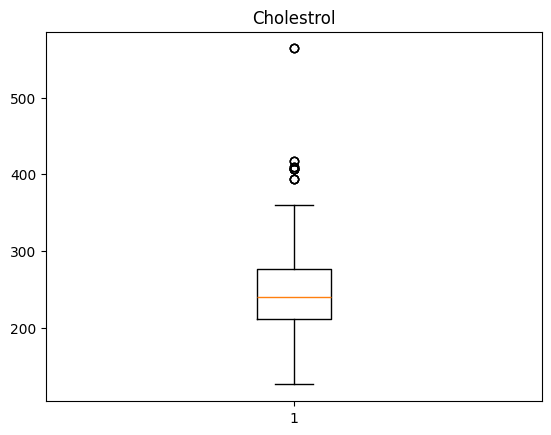

In [15]:
plt.boxplot(df["cholestrol"])
plt.title("Cholestrol")
plt.show()

As we can clearly see that there are a few outliers, we address them using the mean value of the feature. 

In [16]:
mean_value = df['cholestrol'].mean() 

for i in df['cholestrol']:
    if i > 380:
        df['cholestrol'] = df['cholestrol'].replace(i, mean_value)


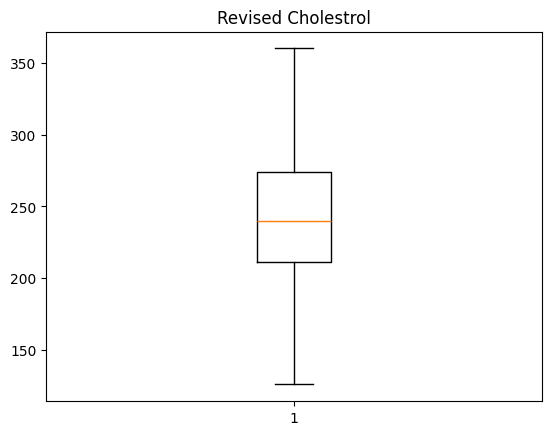

In [17]:
plt.boxplot(df["cholestrol"])
plt.title("Revised Cholestrol")
plt.show()

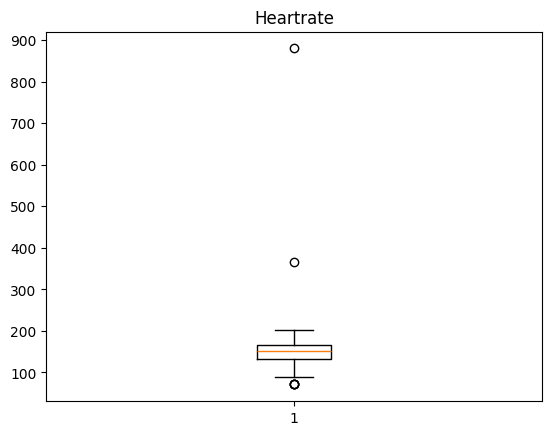

In [18]:
plt.boxplot(df['max_heart_rate'])
plt.title("Heartrate")
plt.show()

In [19]:
for i in df['max_heart_rate']:
    if i > 180:
        df['max_heart_rate'] = df['max_heart_rate'].replace(i, 180)

We replaced the outliers with 180 as it is the maximum heart rate of a person

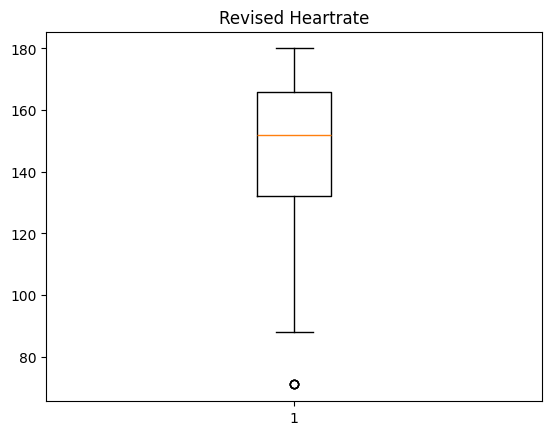

In [20]:
plt.boxplot(df['max_heart_rate'])
plt.title("Revised Heartrate")
plt.show()

In [21]:
df['max_heart_rate'].min()

np.float64(71.0)

## Data Wrangling

#### One Hot Encoding

In [22]:
ohe = OneHotEncoder(drop='first')
en_gender = pd.get_dummies(df['gender']) 
en_array = ohe.fit_transform(en_gender).toarray()
df['gender'] = en_array
print(df['gender'])

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1194    0.0
1195    1.0
1196    0.0
1198    0.0
1199    0.0
Name: gender, Length: 1185, dtype: float64


#### Ordinal Encoding

In [23]:
df['chestpain'].unique()

array(['asymptomatic', 'atypical angina', 'non-anginal pain',
       'typical angina'], dtype=object)

In [24]:
cp_order = {"asymptomatic" : 1, "atypical angina" : 2, "non-anginal pain" : 3, "typical angina" : 4}
df['chestpain'] = df['chestpain'].map(cp_order)
df['chestpain']

0       1
1       1
2       1
3       1
4       1
       ..
1194    1
1195    2
1196    3
1198    1
1199    3
Name: chestpain, Length: 1185, dtype: int64

In [25]:
df['thalassemia'].unique()

array(['reversible defect', 'normal blood flow', 'fixed defect'],
      dtype=object)

In [26]:
th_order = {"reversible defect" : 1, "normal blood flow" : 2, "fixed defect" : 3}
df['thalassemia'] = df['thalassemia'].map(th_order)

df['thalassemia']

0       1
1       1
2       1
3       1
4       2
       ..
1194    2
1195    2
1196    1
1198    1
1199    1
Name: thalassemia, Length: 1185, dtype: int64

In [27]:
df['target'].value_counts()

target
1    606
0    579
Name: count, dtype: int64

## Data Modelling

#### Splitting the data

In [28]:
X = df.drop(columns='target', axis = 1)
Y = df['target']

In [29]:
print(X)

      age  gender  chestpain  resting_blood_pressure  cholestrol  \
0      52     1.0          1                   125.0       212.0   
1      53     0.0          1                   140.0       203.0   
2      70     0.0          1                   145.0       174.0   
3      61     0.0          1                   148.0       203.0   
4      62     1.0          1                   138.0       294.0   
...   ...     ...        ...                     ...         ...   
1194   43     0.0          1                   150.0       247.0   
1195   54     1.0          2                   132.0       288.0   
1196   58     0.0          3                   105.0       240.0   
1198   60     0.0          1                   140.0       293.0   
1199   54     0.0          3                   150.0       232.0   

      fasting_blood_sugar  restecg  max_heart_rate  exercise_induced_angina  \
0                       0      1.0           168.0                        0   
1                       1

In [30]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1194    1
1195    1
1196    1
1198    0
1199    1
Name: target, Length: 1185, dtype: int64


## Train the Model

#### Split the model into training and testing data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 50) 

In [32]:
print(X_train.shape, X_test.shape)

(948, 13) (237, 13)


#### Using Logistic Regression algorithm and training the model

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

## Test the Model

#### Testing the model using testing data

In [35]:
test_data_pred = model.predict(X_test)
test_data_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

#### Testing the model using training data

In [36]:
train_data_pred = model.predict(X_train)
train_data_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

## Model Evaluation

#### Accuracy check on training data

In [37]:
training_data_accuracy = round(accuracy_score(train_data_pred, Y_train) * 100, 2)
print(f"Accuracy on training data = {training_data_accuracy}%")

Accuracy on training data = 85.02%


#### Accuracy check on testing data

In [38]:
testing_data_accuracy = round(accuracy_score(test_data_pred, Y_test) * 100, 2)
print(f"Accuracy on testing data = {testing_data_accuracy}%")

Accuracy on testing data = 86.92%


## Dynamic Prediction Module

In [39]:
user_data = (61,1,1,130,330,0,0,169,0,0,2,0,2)

#### Change the input into a numpy array

In [40]:
user_data_nparray = np.asarray(user_data)
user_data_nparray

array([ 61,   1,   1, 130, 330,   0,   0, 169,   0,   0,   2,   0,   2])

#### Reshape the data for one instance

### Here below reshape(1,-1) Means (1,-1)-row vector - one row and multiple columns

In [41]:
user_data_nparray_reshaped = user_data_nparray.reshape(1,-1)
user_data_nparray_reshaped

array([[ 61,   1,   1, 130, 330,   0,   0, 169,   0,   0,   2,   0,   2]])

#### Make the prediction on the user data

In [42]:
user_data_pred = model.predict(user_data_nparray_reshaped)
user_data_pred

array([1])

#### Convert numeric value into text as output

In [43]:
if user_data_pred == 1:
    print("The person has an unhealthy heart.")
else:
    print("The person has a healthy heart.")

The person has an unhealthy heart.


## Saving the model

In [44]:
pickle.dump(model, open("Heart_Disease_Detection_Model_Using_LR", "wb"))

## Model Deployment